In [40]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import shap
import joblib

In [42]:
# Load the dataset
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [44]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\3634923312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


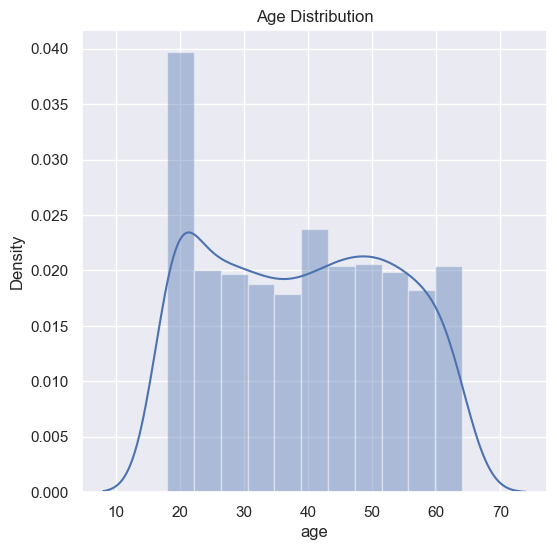

In [47]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

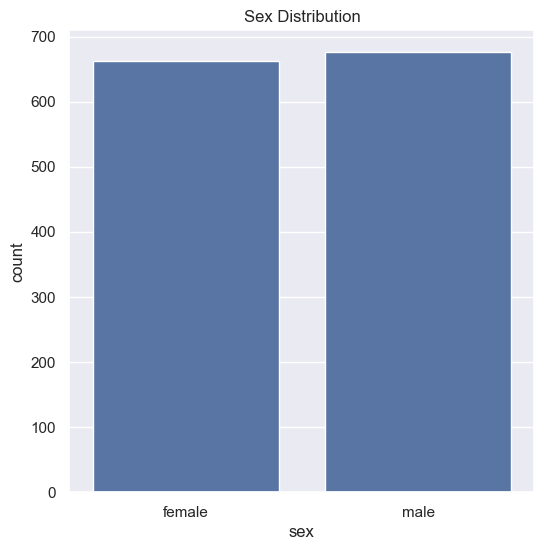

In [48]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [49]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\1916795400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


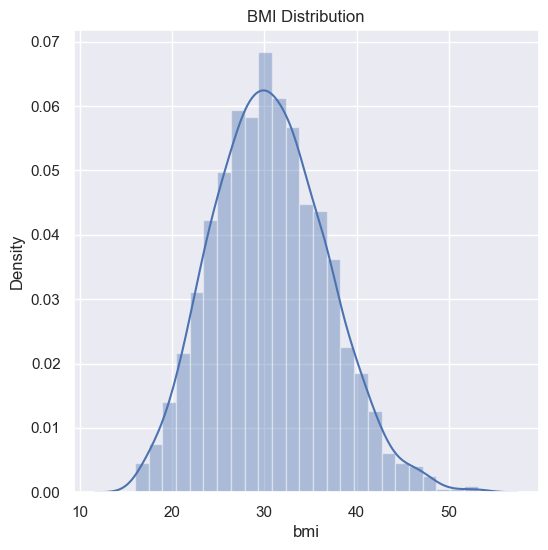

In [50]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

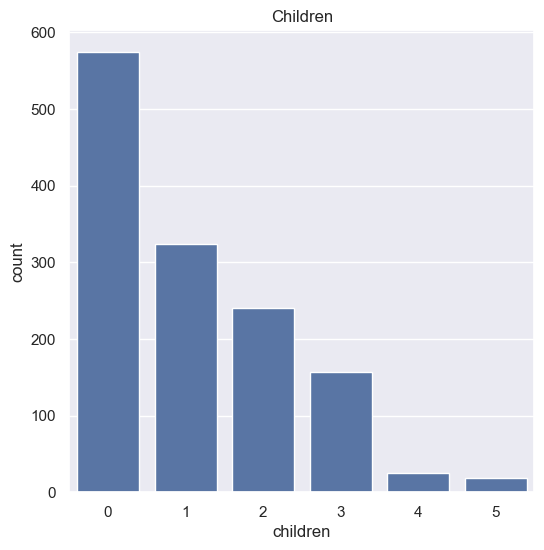

In [51]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [52]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

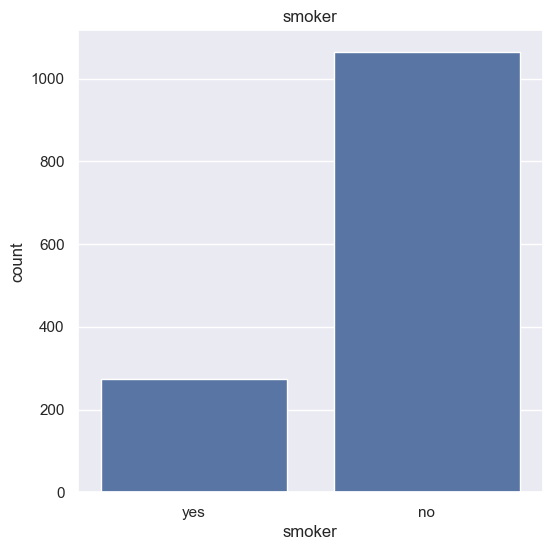

In [53]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [54]:
insurance_dataset['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

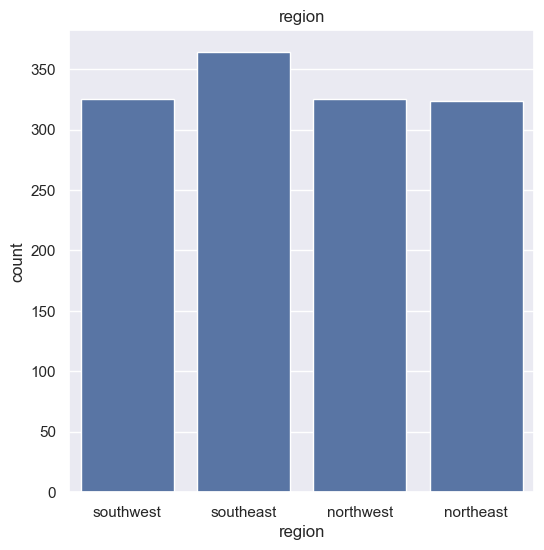

In [55]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [56]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\3971177022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


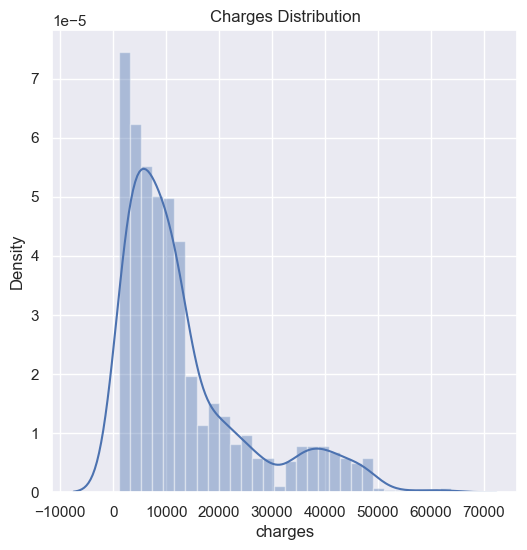

In [57]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [58]:
# Encode categorical variables
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\1309938808.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\1309938808.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16316\1309938808.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

In [59]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [60]:
# Splitting features and target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [61]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [62]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [78]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [63]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [64]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [65]:

# ==========================
# Train Linear Regression
# ==========================
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [66]:
# ==========================
# Train Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [67]:
# ==========================
# Train XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
# ==========================
# Sample Prediction
# ==========================
input_data = (31, 1, 25.74, 0, 1, 0)
input_data_np = np.asarray(input_data).reshape(1, -1)

In [69]:
print("\nPredicted Costs:")
print("Linear Regression:", regressor.predict(input_data_np)[0])
print("Random Forest:", rf_model.predict(input_data_np)[0])
print("XGBoost:", xgb_model.predict(input_data_np)[0])


Predicted Costs:
Linear Regression: 3760.0805764960496
Random Forest: 3729.6420035000065
XGBoost: 3743.1028


C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [70]:
# ==========================
# SHAP Explanations
# ==========================
shap.initjs()


SHAP for Linear Regression


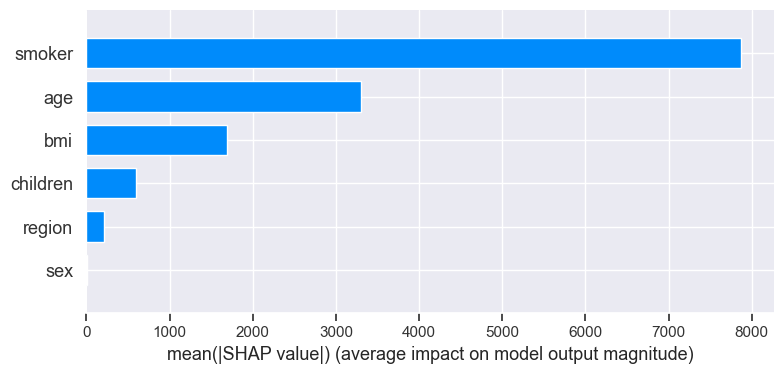

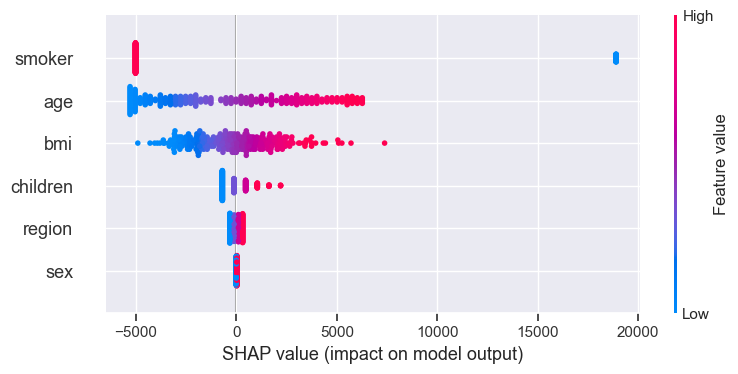

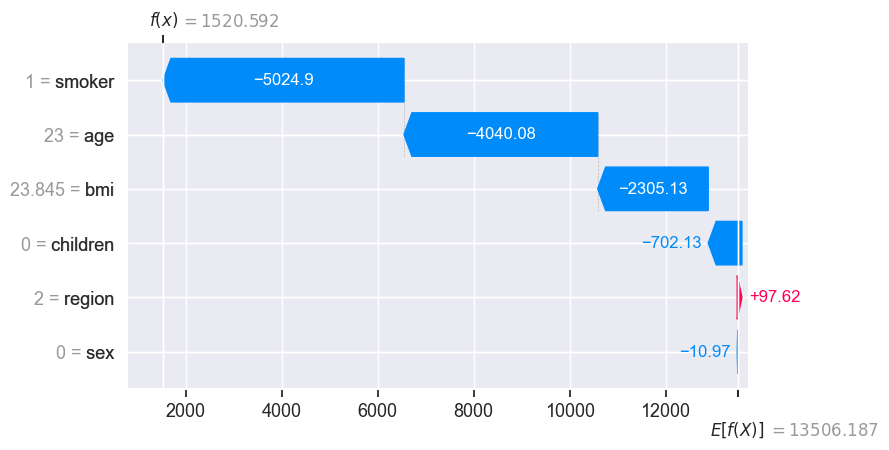

In [71]:
# 1. SHAP Linear Regression
print("\nSHAP for Linear Regression")
linear_explainer = shap.Explainer(regressor, X_train)
linear_shap_values = linear_explainer(X_test)
shap.summary_plot(linear_shap_values, X_test, plot_type="bar")
shap.summary_plot(linear_shap_values, X_test)
shap.plots.waterfall(linear_shap_values[0], max_display=10)



SHAP for Random Forest


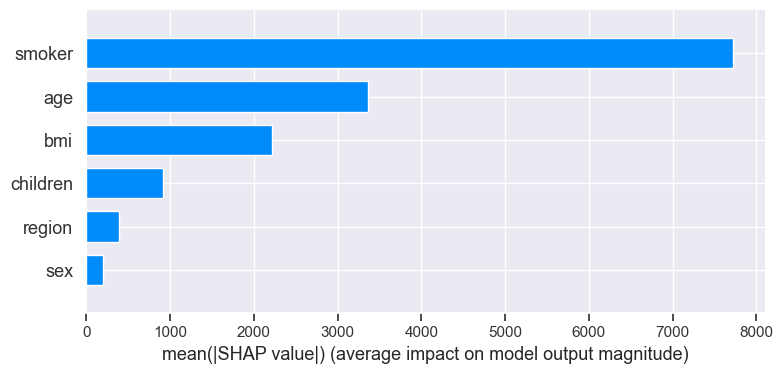

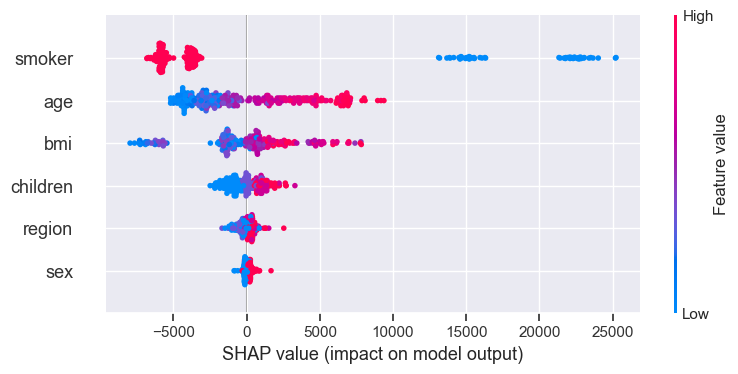

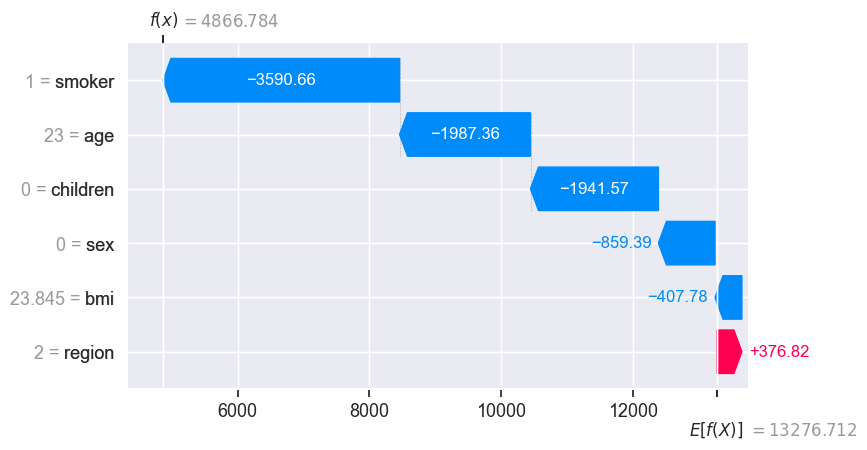

In [72]:
# 2. SHAP Random Forest
print("\nSHAP for Random Forest")
rf_explainer = shap.Explainer(rf_model, X_train, feature_perturbation="interventional")
rf_shap_values = rf_explainer(X_test, check_additivity=False)
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")
shap.summary_plot(rf_shap_values, X_test)
shap.plots.waterfall(rf_shap_values[0], max_display=10)


SHAP for XGBoost


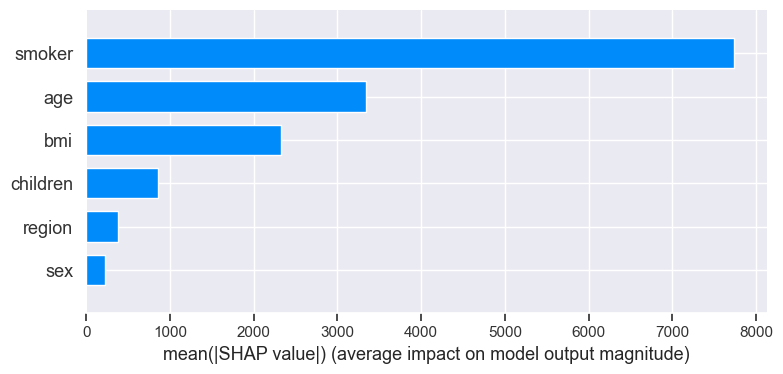

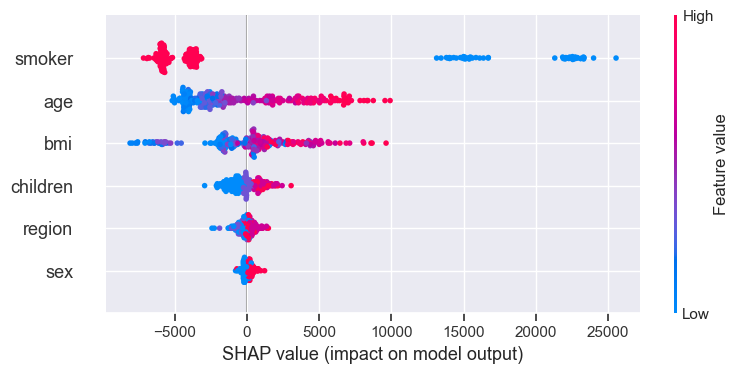

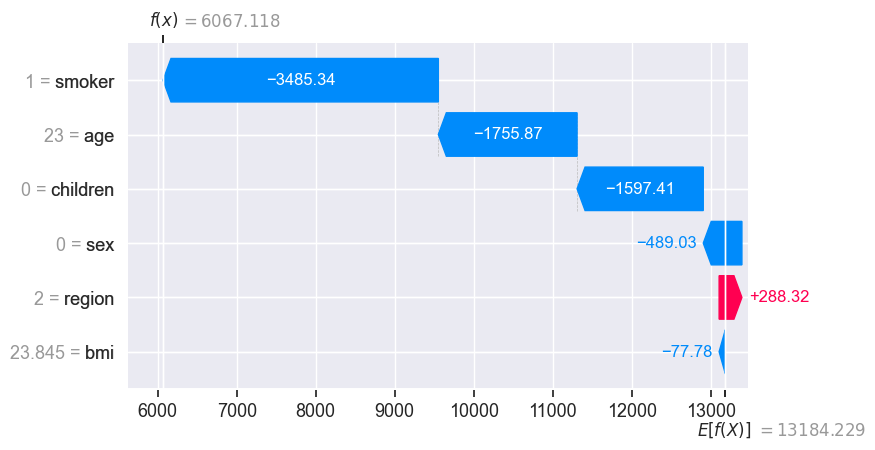

In [73]:
# 3. SHAP for XGBoost
print("\nSHAP for XGBoost")
xgb_explainer = shap.Explainer(xgb_model, X_train)
xgb_shap_values = xgb_explainer(X_test)
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar")
shap.summary_plot(xgb_shap_values, X_test)
shap.plots.waterfall(xgb_shap_values[0], max_display=10)

In [74]:

# Model Performance Metrics

print("\nModel Evaluation Metrics:")

# Linear Regression Evaluation
y_pred_lr = regressor.predict(X_test)
print("\nLinear Regression:")
print("MAE:", metrics.mean_absolute_error(Y_test, y_pred_lr))
print("MSE:", metrics.mean_squared_error(Y_test, y_pred_lr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred_lr)))


Model Evaluation Metrics:

Linear Regression:
MAE: 4267.213826730733
MSE: 38337035.48643883
RMSE: 6191.690842285234


In [75]:
# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("MAE:", metrics.mean_absolute_error(Y_test, y_pred_rf))
print("MSE:", metrics.mean_squared_error(Y_test, y_pred_rf))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred_rf)))


Random Forest:
MAE: 2752.505484245075
MSE: 24341319.02581295
RMSE: 4933.692230552383


In [76]:
# XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost:")
print("MAE:", metrics.mean_absolute_error(Y_test, y_pred_xgb))
print("MSE:", metrics.mean_squared_error(Y_test, y_pred_xgb))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred_xgb)))


XGBoost:
MAE: 2705.064945154793
MSE: 23268448.929038677
RMSE: 4823.738065964888


In [77]:
# Predict Charges from Single User Input
user_input = (28, 1, 26.2, 1, 1, 2)
# Convert to NumPy array and reshape for prediction
input_data_np = np.asarray(user_input).reshape(1, -1)
# Make predictions with all three models
pred_lr = regressor.predict(input_data_np)[0]
pred_rf = rf_model.predict(input_data_np)[0]
pred_xgb = xgb_model.predict(input_data_np)[0]
# Display the results
print("Predicted Insurance Charges for Input:", user_input)
print("Linear Regression Prediction: ₹", round(pred_lr, 2))
print("Random Forest Prediction: ₹", round(pred_rf, 2))
print("XGBoost Prediction: ₹", round(pred_xgb, 2))

# ==========================
# Save XGBoost Model with joblib
# ==========================
joblib.dump(xgb_model, 'xgb_model.joblib')
print("XGBoost model saved successfully as 'xgb_model.joblib'")

Predicted Insurance Charges for Input: (28, 1, 26.2, 1, 1, 2)
Linear Regression Prediction: ₹ 4162.68
Random Forest Prediction: ₹ 9163.18
XGBoost Prediction: ₹ 7149.49
XGBoost model saved successfully as 'xgb_model.joblib'


C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [79]:
joblib.dump(insurance_dataset, 'insurance_dataset.joblib')
print("Encoded dataset saved as 'insurance_dataset.joblib'")


Encoded dataset saved as 'insurance_dataset.joblib'


In [80]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')